## Librerías:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rasterio
import zipfile

Para los datos Landsat 8 utilizamos las siguientes fórmulas de MNDWI y NDVI:  

*MNDWI = (Verde – SWIR)/(Verde + SWIR)*   
**MNDWI = (Banda 3 – Banda 6)/(Banda 3 + Banda 6)**  

*NDVI = (NIR – Rojo)/(NIR + Rojo)*  
**NDVI = (Banda 5 - Banda 4)/(Banda 5 + Banda 4)**  


## Carga y exploración de imagenes

Extracción del zip

In [2]:
imagenes = zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip', 'r')
imgfile = imagenes.read('2023-05-14.SR_B3.tif')
with zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip') as myzip:
    myzip.extractall('Los-Molinos_2023-05-14_6_all_bands/')

Carga de imágenes

In [3]:
path = 'Los-Molinos_2023-05-14_6_all_bands/'

B3= rasterio.open(path + '2023-05-14.SR_B3.tif').read(1).astype(float)
B4= rasterio.open(path + '2023-05-14.SR_B4.tif').read(1).astype(float)
B5= rasterio.open(path + '2023-05-14.SR_B5.tif').read(1).astype(float)
B6= rasterio.open(path + '2023-05-14.SR_B6.tif').read(1).astype(float)


### Exploración de las imágenes

Metadatos

In [4]:
with rasterio.open('../Los-Molinos_2023-05-14_6_all_bands/2023-05-14.SR_B3.tif', 'r+') as dataset:
    # Leer los metadatos del archivo de imagen
    print("CRS:", dataset.crs)
    print("Ancho:", dataset.width)
    print("Altura:", dataset.height)
    print("Número de bandas:", dataset.count)
    meta = dataset.meta
    # Imprimir los metadatos
    print(meta)

CRS: EPSG:32620
Ancho: 298
Altura: 406
Número de bandas: 1
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 298, 'height': 406, 'count': 1, 'crs': CRS.from_epsg(32620), 'transform': Affine(30.0, 0.0, 350325.0,
       0.0, -30.0, -3516975.0)}


Dimensiones:

In [5]:
# Obtenemos las dimensiones
print("Dimensiones de imagen B3:")
[filas, columnas] = B3.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B4:")
[filas, columnas] = B4.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B5:")
[filas, columnas] = B5.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B6:")
[filas, columnas] = B6.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

# Mostramos qué tipo de objeto son las bandas
print('\nTipo de objeto: ', type(B3), type(B4), type(B5), type(B6))



Dimensiones de imagen B3:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B4:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B5:
        Filas =  406 ; Columnas =  298
Dimensiones de imagen B6:
        Filas =  406 ; Columnas =  298

Tipo de objeto:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Visualizamos las imagenes de las bandas en tonos de grises

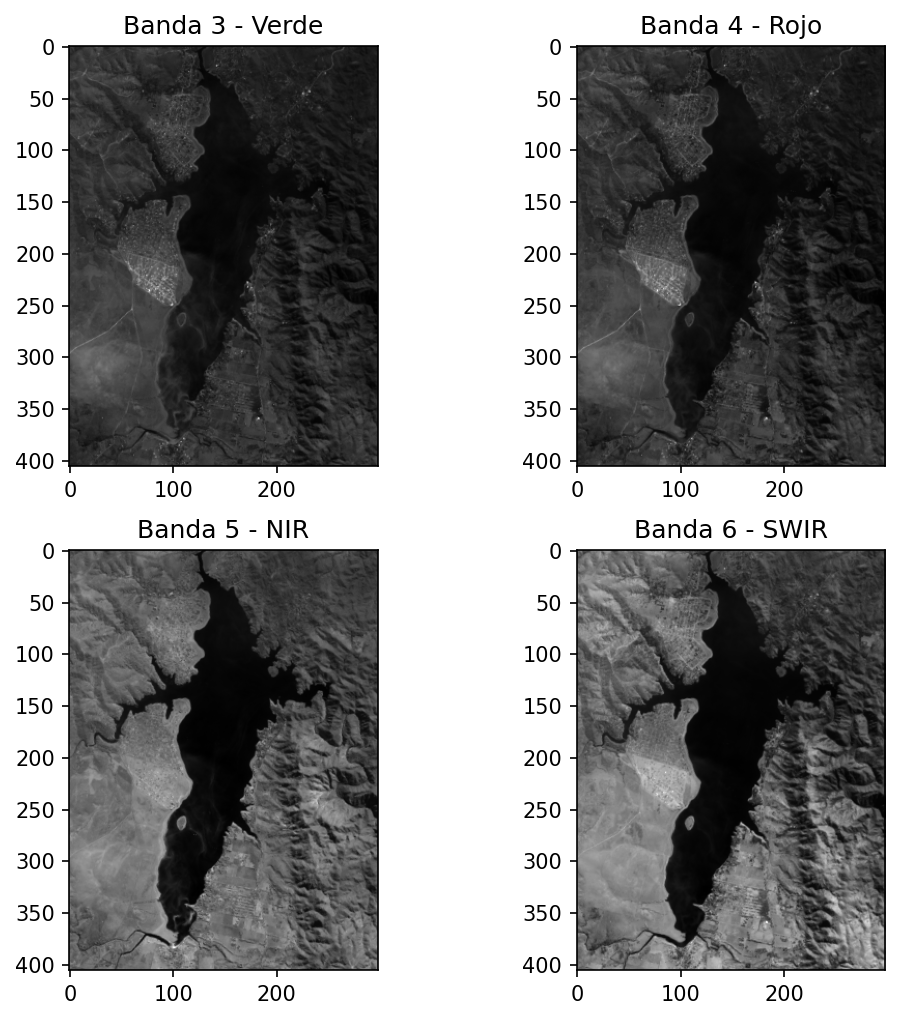

In [6]:
# Armamos la figura
plt.figure(figsize=(8, 8), dpi= 150, facecolor='w', edgecolor='k')
# Banda 3
plt.subplot(2,2,1)
plt.title('Banda 3 - Verde')
plt.imshow(B3, cmap='gray')
# Banda 4
plt.subplot(2,2,2)
plt.title('Banda 4 - Rojo')
plt.imshow(B4, cmap='gray')
# Banda 5
plt.subplot(2,2,3)
plt.title('Banda 5 - NIR')
plt.imshow(B5, cmap='gray')
# Banda 6
plt.subplot(2,2,4)
plt.title('Banda 6 - SWIR')
plt.imshow(B6, cmap='gray')


Otra forma de ver las imágenes usando rasterio

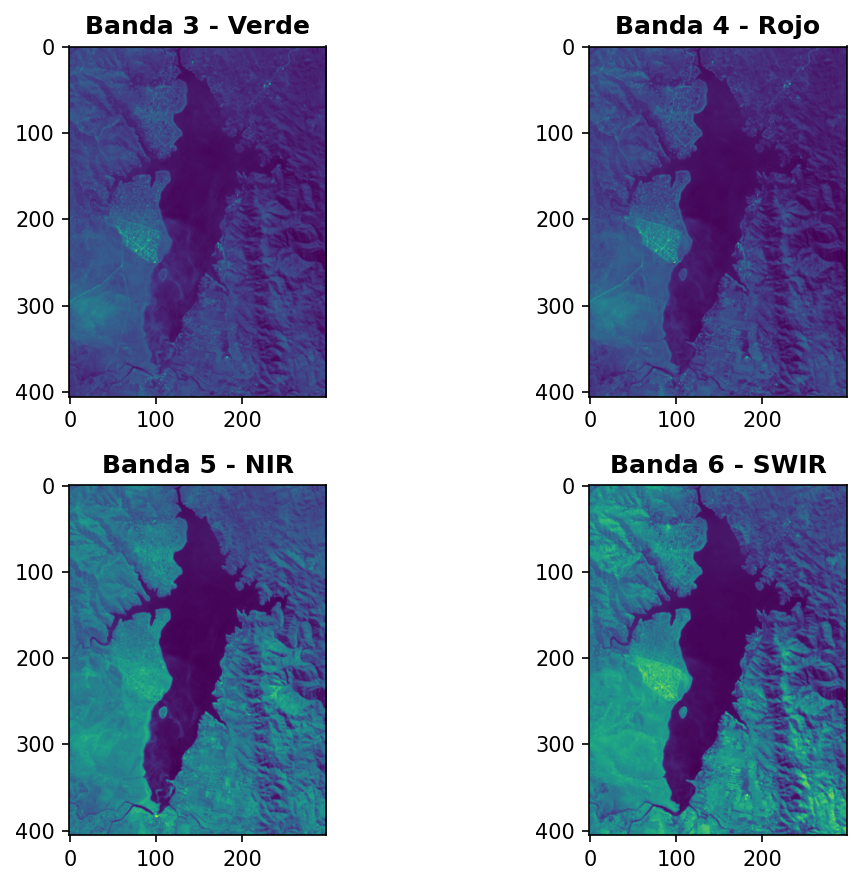

In [7]:
from rasterio import plot
fig, axs = plt.subplots(2,2, figsize=(8, 6), dpi= 150, facecolor='w', edgecolor='k')
axs = axs.ravel()
plot.show(B3, ax=axs[0], title='Banda 3 - Verde')
plot.show(B4, ax=axs[1], title='Banda 4 - Rojo')
plot.show(B5, ax=axs[2], title='Banda 5 - NIR')
plot.show(B6, ax=axs[3], title='Banda 6 - SWIR')
fig.tight_layout()

Histograma de las imágenes

Text(0.5, 1.0, 'Banda 6 - SWIR')

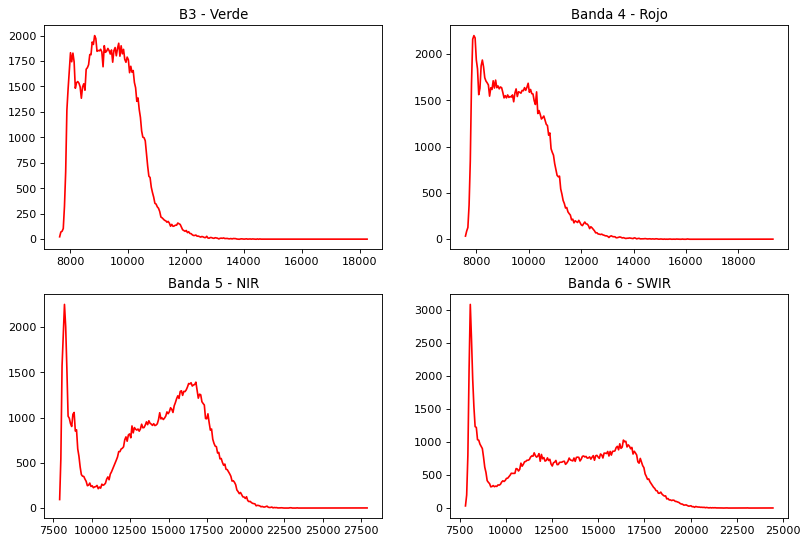

In [8]:
# Histogramas de las bandas
B3_hist, B3_edges = np.histogram(B3, bins=256)
B4_hist, B4_edges = np.histogram(B4, bins=256)
B5_hist, B5_edges = np.histogram(B5, bins=256)
B6_hist, B6_edges = np.histogram(B6, bins=256)
# Creamos la figura
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# Subplot 1
plt.subplot(2,2,1)
plt.plot(B3_edges[1:], B3_hist,'r')
plt.title('B3 - Verde')
# Subplot 2
plt.subplot(2,2,2)
plt.plot(B4_edges[1:], B4_hist,'r')
plt.title('Banda 4 - Rojo')
# Subplot 3
plt.subplot(2,2,3)
plt.plot(B5_edges[1:], B5_hist,'r')
plt.title('Banda 5 - NIR')
# Subplot 4
plt.subplot(2,2,4)
plt.plot(B6_edges[1:], B6_hist,'r')
plt.title('Banda 6 - SWIR')


### Outliers

In [9]:
# Función outliers
def find_outliers(data):
    # Calcular el primer y tercer cuartil (Q1 y Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Definir los límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

### Banda 3

    #Máscara outlier
outliers_mask3 = find_outliers(B3.flatten()).reshape(B3.shape)
    #Copia para enmascarar
BB3= np.copy(B3)
 # Enmascarar los outliers con np.nan 
BB3[outliers_mask3] = np.nan 

    # Imprimir resultados
print("Número de outliers encontrados B3:", np.sum(outliers_mask3))

### Banda 4

    #Máscara outlier
outliers_mask4 = find_outliers(B4.flatten()).reshape(B4.shape)
    #Copia para enmascarar
BB4= np.copy(B4)
 # Enmascarar los outliers con np.nan 
BB4[outliers_mask4] = np.nan 

    # Imprimir resultados
print("Número de outliers encontrados B4:", np.sum(outliers_mask4))
### Banda 5

    #Máscara outlier
outliers_mask5 = find_outliers(B5.flatten()).reshape(B5.shape)
    #Copia para enmascarar
BB5= np.copy(B5)
 # Enmascarar los outliers con np.nan 
BB5[outliers_mask5] = np.nan 

    # Imprimir resultados
print("Número de outliers encontrados B5:", np.sum(outliers_mask5))

### Banda 6

    #Máscara outlier
outliers_mask6 = find_outliers(B6.flatten()).reshape(B6.shape)
    #Copia para enmascarar
BB6= np.copy(B6)
 # Enmascarar los outliers con np.nan 
BB6[outliers_mask6] = np.nan 

    # Imprimir resultados
print("Número de outliers encontrados B6:", np.sum(outliers_mask6))

print("Límites para outliers: ", np.percentile(B3.flatten(), 25) - 1.5 * (np.percentile(B3.flatten(), 75) - np.percentile(B3.flatten(), 25)),
                                     np.percentile(B3.flatten(), 75) + 1.5 * (np.percentile(B3.flatten(), 75) - np.percentile(B3.flatten(), 25)))


Número de outliers encontrados B3: 882
Número de outliers encontrados B4: 648
Número de outliers encontrados B5: 6
Número de outliers encontrados B6: 1
Límites para outliers:  6561.0 12025.0


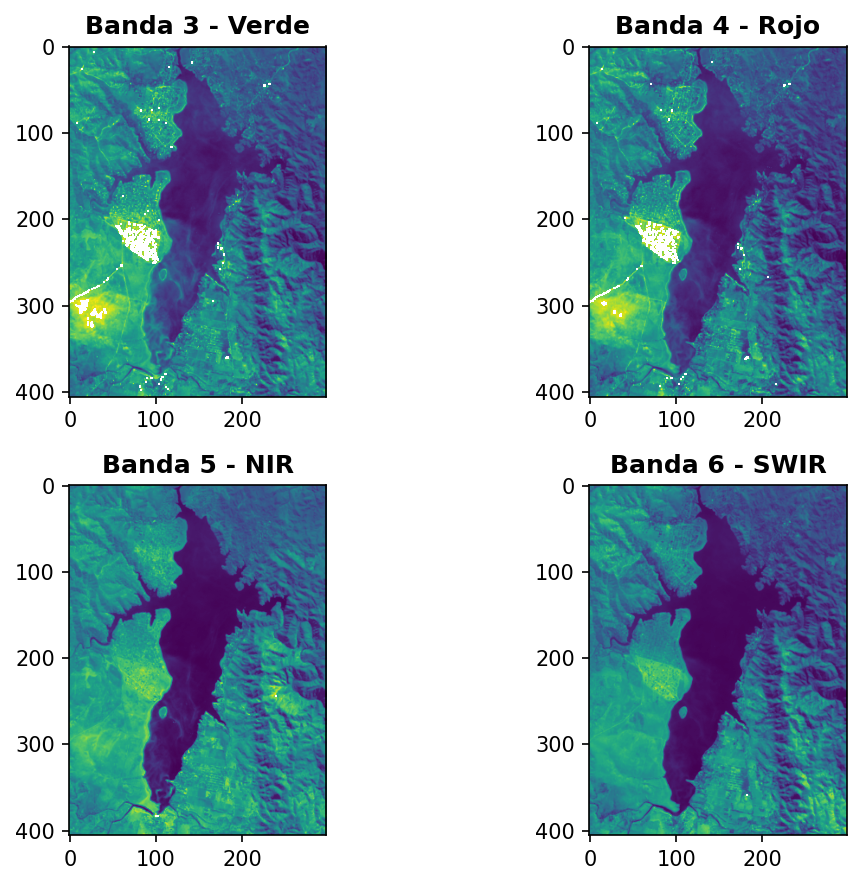

In [10]:
### Plot sin outliers
from rasterio import plot

fig, axs = plt.subplots(2,2, figsize=(8, 6), dpi= 150, facecolor='w', edgecolor='k')
axs = axs.ravel()
plot.show(BB3, ax=axs[0], title='Banda 3 - Verde')
plot.show(BB4, ax=axs[1], title='Banda 4 - Rojo')
plot.show(BB5, ax=axs[2], title='Banda 5 - NIR')
plot.show(BB6, ax=axs[3], title='Banda 6 - SWIR')
fig.tight_layout()

Text(0.5, 1.0, 'Banda 6 - SWIR')

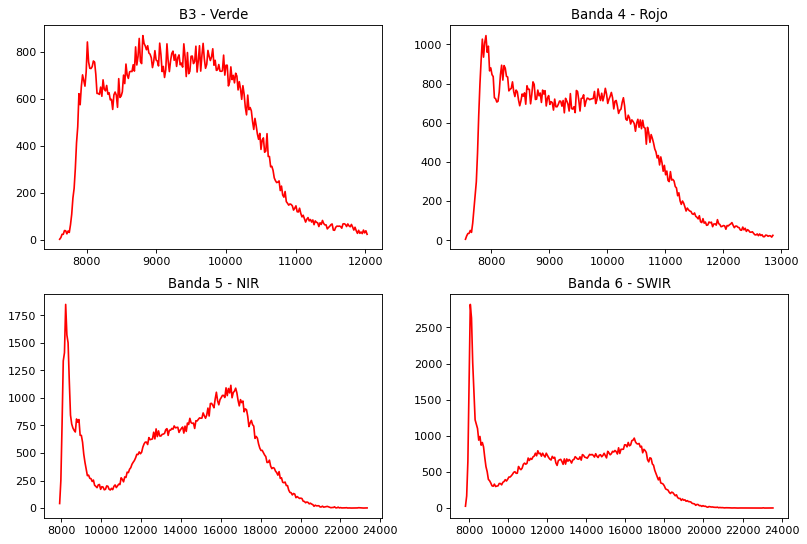

In [11]:
#### HISTOGRAMAS SIN OUTLIERS
# Histogramas de las bandas
BB3_hist, BB3_edges = np.histogram(BB3[~np.isnan(BB3)], bins=256)
BB4_hist, BB4_edges = np.histogram(BB4[~np.isnan(BB4)], bins=256)
BB5_hist, BB5_edges = np.histogram(BB5[~np.isnan(BB5)], bins=256)
BB6_hist, BB6_edges = np.histogram(BB6[~np.isnan(BB6)], bins=256)
# Creamos la figura
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# Subplot 1
plt.subplot(2,2,1)
plt.plot(BB3_edges[1:], BB3_hist,'r')
plt.title('B3 - Verde')
# Subplot 2
plt.subplot(2,2,2)
plt.plot(BB4_edges[1:], BB4_hist,'r')
plt.title('Banda 4 - Rojo')
# Subplot 3
plt.subplot(2,2,3)
plt.plot(BB5_edges[1:], BB5_hist,'r')
plt.title('Banda 5 - NIR')
# Subplot 4
plt.subplot(2,2,4)
plt.plot(BB6_edges[1:], BB6_hist,'r')
plt.title('Banda 6 - SWIR')

## MNDWI

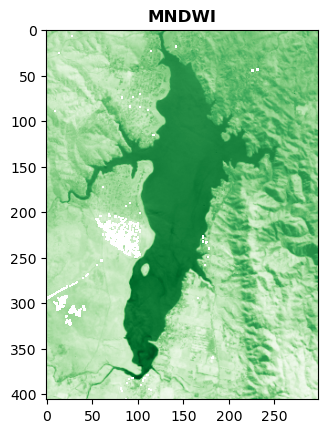

Umbral de corte en: -0.04482758620689655


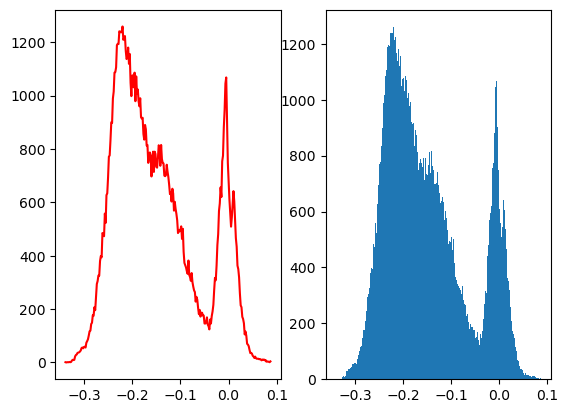

In [12]:
#Cálculo de MNDWI
mdwi = np.where(
                (BB3+BB6)==0.,
                0,
                (BB3-BB6)/(BB3+BB6)
               )
plot.show(mdwi, cmap='Greens', title='MNDWI')

# Histograma
mdwi_hist, mdwi_edges = np.histogram(mdwi[~np.isnan(mdwi)], bins=256)
plt.subplot(1,2,1)
plt.plot(mdwi_edges[1:], mdwi_hist,'r')
plt.subplot(1,2,2)
plt.hist(mdwi[~np.isnan(mdwi)], bins=256)

# Encontrar el índice del valor con menor frecuencia en el histograma
filtered_data = mdwi[(mdwi >= -0.1) & (mdwi <= 0)]
mdwi_hist, mdwi_edges = np.histogram(filtered_data, bins=np.linspace(-0.1, 0.0, 30))
min_freq_index = np.argmin(mdwi_hist)
min_freq_value = mdwi_edges[min_freq_index]
print('Umbral de corte en:', min_freq_value)

Generamos el filtro para hacer la máscara:

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


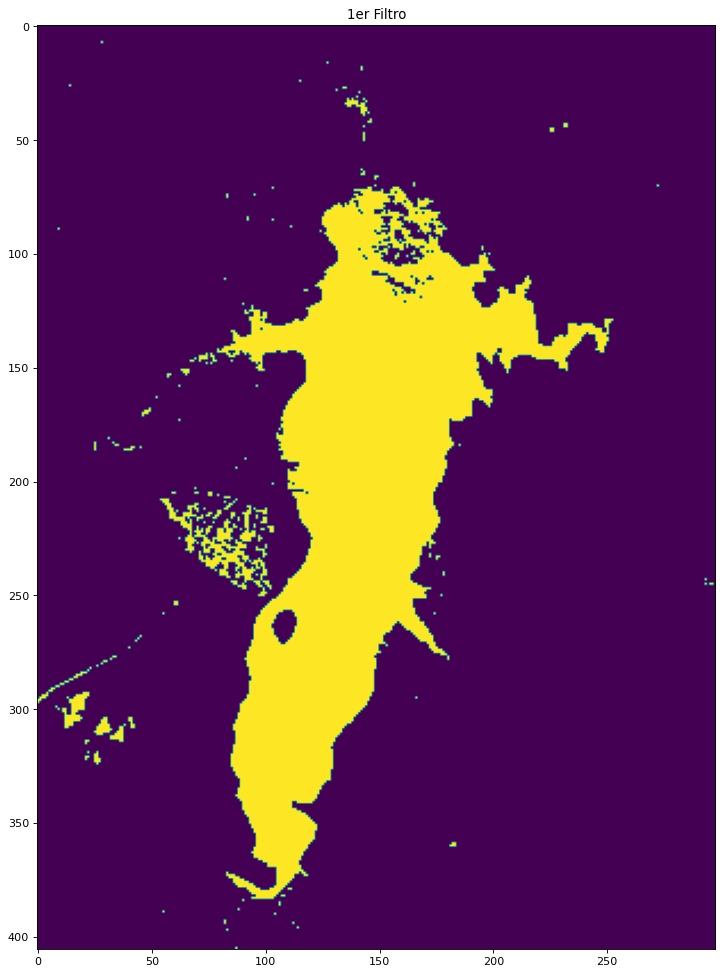

In [13]:
# Filtro y máscara
filtro = np.zeros([filas, columnas])
mascara = mdwi<-0.02 # definimos este límite para no sumar datos por fuera del lago, aunque perdamos parte del cuerpo de agua
filtro[mascara] = -1
print(mascara)
plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k') 
plt.imshow(filtro)
plt.title('1er Filtro')
plt.show()


## Recorte de las bandas

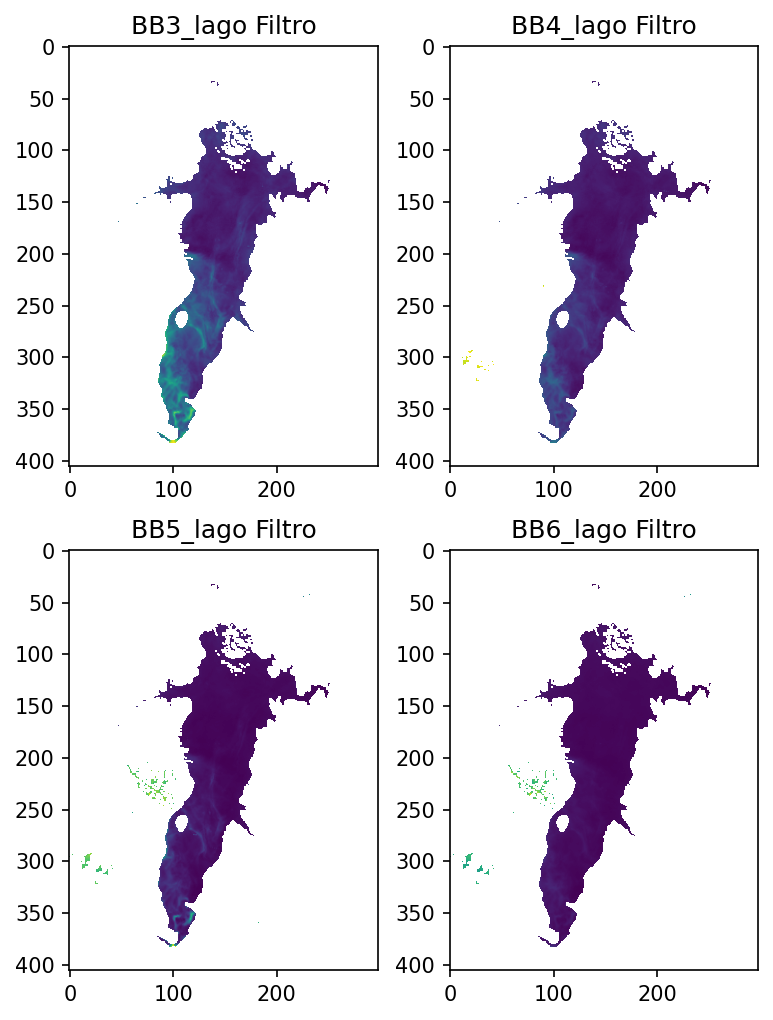

In [14]:
BB3_lago = np.copy(BB3)
BB3_lago[mascara] = np.nan
BB4_lago = np.copy(BB4)
BB4_lago[mascara] = np.nan
BB5_lago = np.copy(BB5)
BB5_lago[mascara] = np.nan
BB6_lago = np.copy(BB6)
BB6_lago[mascara] = np.nan
plt.figure(figsize=(6, 8), dpi= 150, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.imshow(BB3_lago)
plt.title('BB3_lago Filtro')
plt.subplot(2,2,2)
plt.imshow(BB4_lago)
plt.title('BB4_lago Filtro')
plt.subplot(2,2,3)
plt.imshow(BB5_lago)
plt.title('BB5_lago Filtro')
plt.subplot(2,2,4)
plt.imshow(BB6_lago)
plt.title('BB6_lago Filtro')
plt.show()

## NDVI
Calculamos el NDVI con las bandas recortadas:

/tmp/ipykernel_6819/2728544774.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=np.nanmin(ndvi), vmax=np.nanmax(ndvi)),cmap="Greens"),label='NDVI')


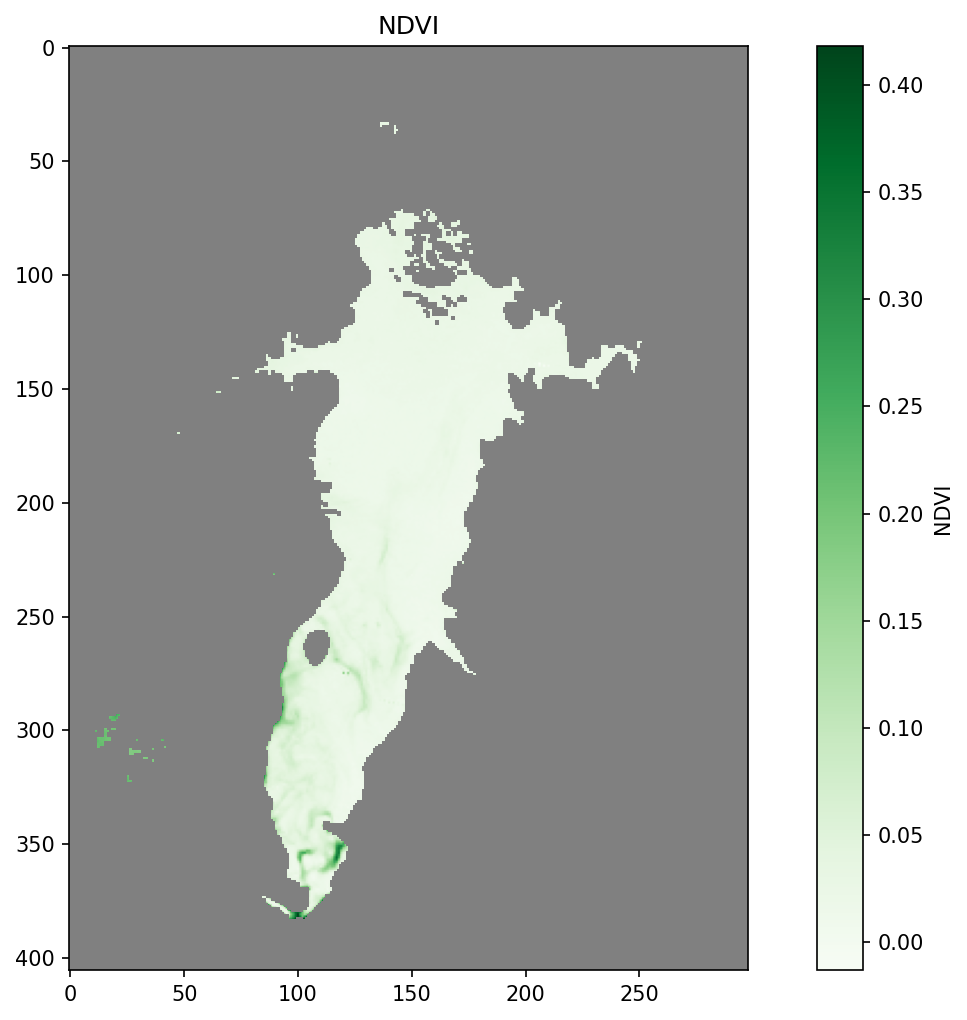

In [69]:
ndvi = np.where(
                (BB5_lago+BB4_lago)==0.,
                0,
                (BB5_lago-BB4_lago)/(BB5_lago+BB4_lago)
               )

import matplotlib.cm as cm

#Gráficos
fig, ax = plt.subplots(figsize=(12, 8), dpi= 150, facecolor='w', edgecolor='k')
ax.imshow(ndvi, cmap='Greens')
plt.title('NDVI')
ax.set_facecolor("gray")
plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=np.nanmin(ndvi), vmax=np.nanmax(ndvi)),cmap="Greens"),label='NDVI')


#### Histograma

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+01,
        5.100e+01, 2.040e+02, 3.980e+02, 6.540e+02, 8.930e+02, 1.411e+03,
        1.482e+03, 1.515e+03, 1.586e+03, 1.558e+03, 1.269e+03, 9.270e+02,
        6.990e+02, 6.200e+02, 5.940e+02, 5.050e+02, 4.490e+02, 3.710e+02,
        3.030e+02, 2.560e+02, 2.340e+02, 1.660e+02, 1.930e+02, 1.360e+02,
        1.060e+02, 1.220e+02, 9.900e+01, 7.600e+01, 8.900e+01, 6.800e+01,
        7.300e+01, 5.100e+01, 5.500e+01, 6.000e+01, 4.900e+01, 4.700e+01,
        3.400e+01, 4.200e+01, 3.200e+01, 3.800e+01, 4.200e+01, 2.000e+01,
        2.400e+01, 3.000e+01, 3.000e+01, 2.500e+01, 2.000e+01, 1.500e+01,
        1.900e+01, 2.000e+01, 1.800e+01, 1.600e+01, 1.600e+01, 9.000e+00,
        1.100e+01, 1.500e+01, 9.000e+00, 1.200e+01, 1.000e+01, 9.000e+00,
        8.000e+00, 9.000e+00, 2.000e+00, 1.000e+01, 8.000e+00, 3.000e+00,
        5.000e+00, 8.000e+00, 9.000e+0

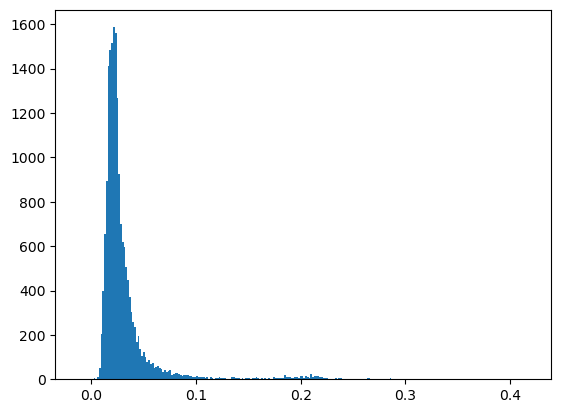

In [68]:
# Histograma
plt.hist(ndvi[~np.isnan(ndvi)], bins=256)

### Exportación de la imagen de NDVI

In [16]:
cols =  rasterio.open('../Los-Molinos_2023-05-14_6_all_bands/2023-05-14.SR_B4.tif', 'r+').width
rows =  rasterio.open('../Los-Molinos_2023-05-14_6_all_bands/2023-05-14.SR_B4.tif', 'r+').height
projection =  rasterio.open('../Los-Molinos_2023-05-14_6_all_bands/2023-05-14.SR_B4.tif', 'r+').crs
transform =  rasterio.open('../Los-Molinos_2023-05-14_6_all_bands/2023-05-14.SR_B4.tif', 'r+').transform

def saveRaster(dataset,datasetPath,cols,rows,projection):
    rasterSet = rasterio.open(datasetPath,
                             'w',
                             driver='GTiff',
                             height=rows,
                             width=cols,
                             count=1,
                             dtype=np.float32,
                             crs=projection,
                             transform=transform,
                             )
    rasterSet.write(dataset,1)
    rasterSet.close()
saveRaster(ndvi.astype('float32'),'./ndviImage.tif',cols,rows,projection)